[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/soloyant/deltax_workshop_2024/blob/main/tutorials/2_SedimentTransport_Dorado/ex1_dorado_steady.ipynb)

<div style="text-align: center;">
    <img src="notebook_illustrations/deltax_2020.png" alt="Delta-X Logo" style="height: 100px; width: auto; display: inline;">
    <img src="notebook_illustrations/Tribrand_ColorBlack_rgb_16x3_160601.png" alt="JPL Logo" style="height: 100px; width: auto; display: inline;">
</div>
<h1 style="text-align: center;">Delta-X 2024 Application Workshop - May 8, 2024</h1>
<h2 style="text-align: center;">Dorado Lagrangian Transport: Hands On Exercises</h2>
<h2 style="text-align: center;">Part 1/2: Steady Case</h2>

<h3>Authors information:</h3>

**Muriel Z.M. Brückner, Ph.D.**  
Assistant Professor  
Coastal Engineering  
Department of Civil and Environmental Engineering  
College of Engineering  
Louisiana State University  

**Antoine Soloy, Ph.D.**  
Division 334F, Caltech - Jet Propulsion Laboratory  
4800 Oak Grove Drive, Pasadena, CA, USA  91109-8099  
Contact: antoine.soloy@jpl.nasa.gov

# *dorado* Example 1 - steady simulation

In this example, particles movement is simulated on gridded ANUGA model output. The case is flow from a channel into an empty basin, and the flow field is static, or steady in time for this example.

In [1]:
import sys

if 'google.colab' in sys.modules:
  # In case the notebook is opened in google collab, here we download/install all the files we need behind the scenes
  try:
      import os
      os.chdir('/content')
      # Grab workbook files into colab directory
      !git clone https://github.com/soloyant/deltax_workshop_2024.git
      !pip install git+https://github.com/passaH2O/dorado.git
      os.chdir('/content/deltax_workshop_2024/tutorials/2_SedimentTransport_Dorado/')
  except:
      pass

In [2]:
import os
import numpy as np
from dorado.routines import steady_plots
import dorado.particle_track as pt
import dorado
path_to_example_data = os.path.join(dorado.__path__[0], 'example_data')

# Get working directory
cwd = os.getcwd()
print(cwd)

/Users/soloy/Documents/GitHub/deltax_workshop_2024/tutorials/2_SedimentTransport_Dorado


In [3]:
# import the example data from zipped data array provided
data = np.load(os.path.join(path_to_example_data, 'ex_anuga_data.npz'))

# import water depth data from ANUGA
depth = data['depth']

# import discharge data from ANUGA
qx = data['qx']
qy = data['qy']

Next the dorado parameter object must be defined and the domain as well as the particle properties must be established. For this example there is no defined stage data, so the depth values will be used instead. First the domain properties will be established.

In [4]:
# establish particle properties in particle.track using modelParams class
params = pt.modelParams()

params.stage = depth  # don't have stage data in example
params.depth = depth

# determine discharge data
params.qx = qx
params.qy = qy

# grid cell size
params.dx = 50.

# name the model
params.model = 'Anuga'

Next the particle class will be defined and a set of particles will be generated.

In [5]:
# define seed locations
seed_xloc = list(range(20, 30))
seed_yloc = list(range(48, 53))

# define numebr of tracers
Np_tracer = 50

# create particles properties using Particles class
particles = pt.Particles(params)

# generate particles
particles.generate_particles(Np_tracer, seed_xloc, seed_yloc)


Theta parameter not specified - using 1.0
Gamma parameter not specified - using 0.05
Diffusion coefficient not specified - using 0.2
minimum depth for wetness not defined - using 10 cm
Cell Types not specified - Estimating from depth
Using weighted random walk


**Note:** Theta reflects the dependency of the random walk on water depth, gamma controls the dependence of the downstream direction on water surface slope and water discharge. A gamma of 0 means that the water slope is ignored when determining the downstream flow direction, and a gamma of 1 means that the discharge values (the flow field) is ignored. The diffusion coefficient accounts for the time that is lost in the random walk due to calculations at the cell centers (in reality particles might travel diagonal of a cell).

Then lastly the particle movement will be simulated for 50 iterations. This will create a new output folder called 'steady_anuga_example' in our working directory.

100%|#####################################################################################| 50/50 [00:08<00:00,  6.25it/s]


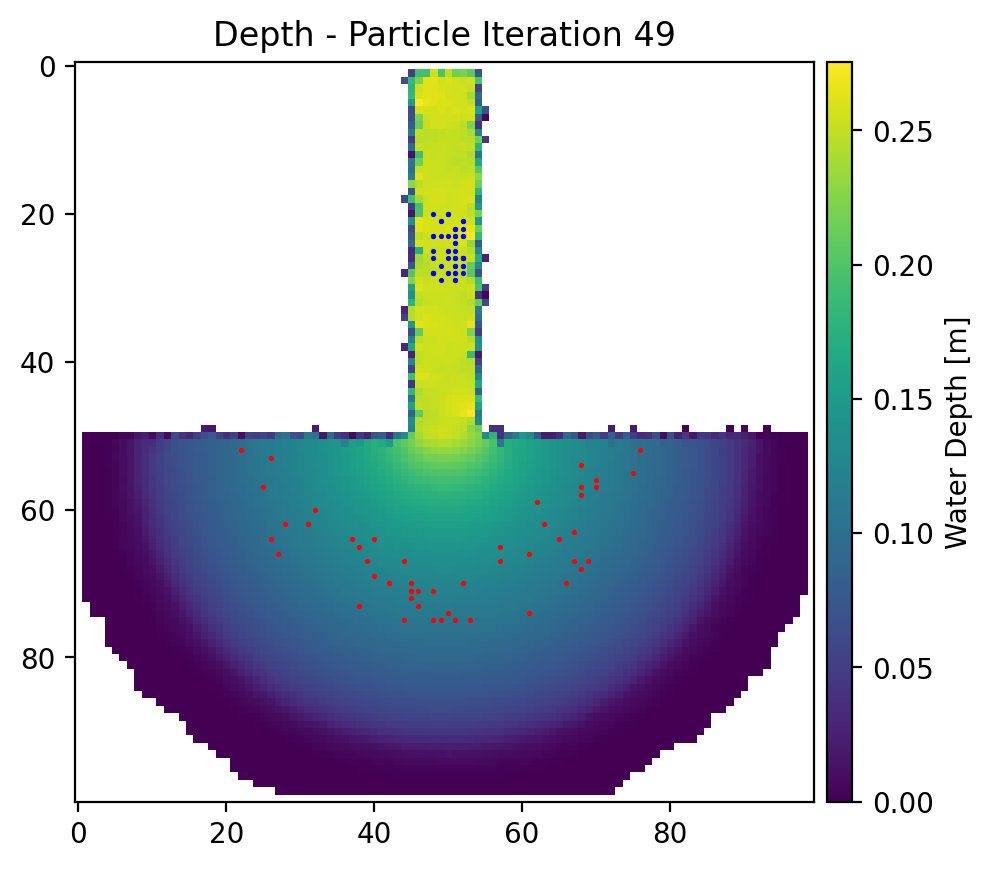

In [6]:
# simulating the particle transport using steady_plots from routines functions
walk_data = steady_plots(particles, 50, 'steady_anuga_example')


**We can visualize the particle transport through an animation.**

The Built-In Animation function in dorado uses the matplotlib library (to keep dependencies at a minimum), however we note that many other animation libraries exist for Python that may provide greater functionality.

The animation is run using the animate_plots routine and saved as mp4-format in the working directory.

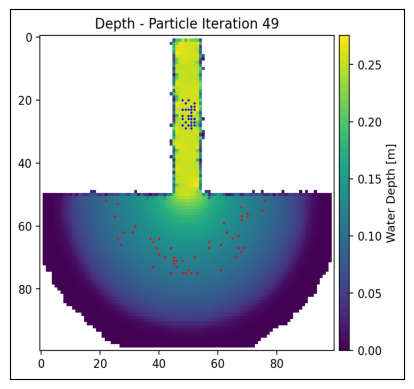

In [7]:
from dorado.routines import animate_plots

animate_plots(0, 50, 'steady_anuga_example')

**We can visualize some of the particle travel paths using the draw_travel_path function.** 

In this example we are going to visualize the travel paths of the first 4 particles, indicated by the list we are providing to the draw_travel_path function. We will show every other iteration to visually simplify the path, controlled by interval parameter.

100%|████████████████████████████████████████████████████████████████████████████████████| 4/4 [00:00<00:00, 15679.64it/s]


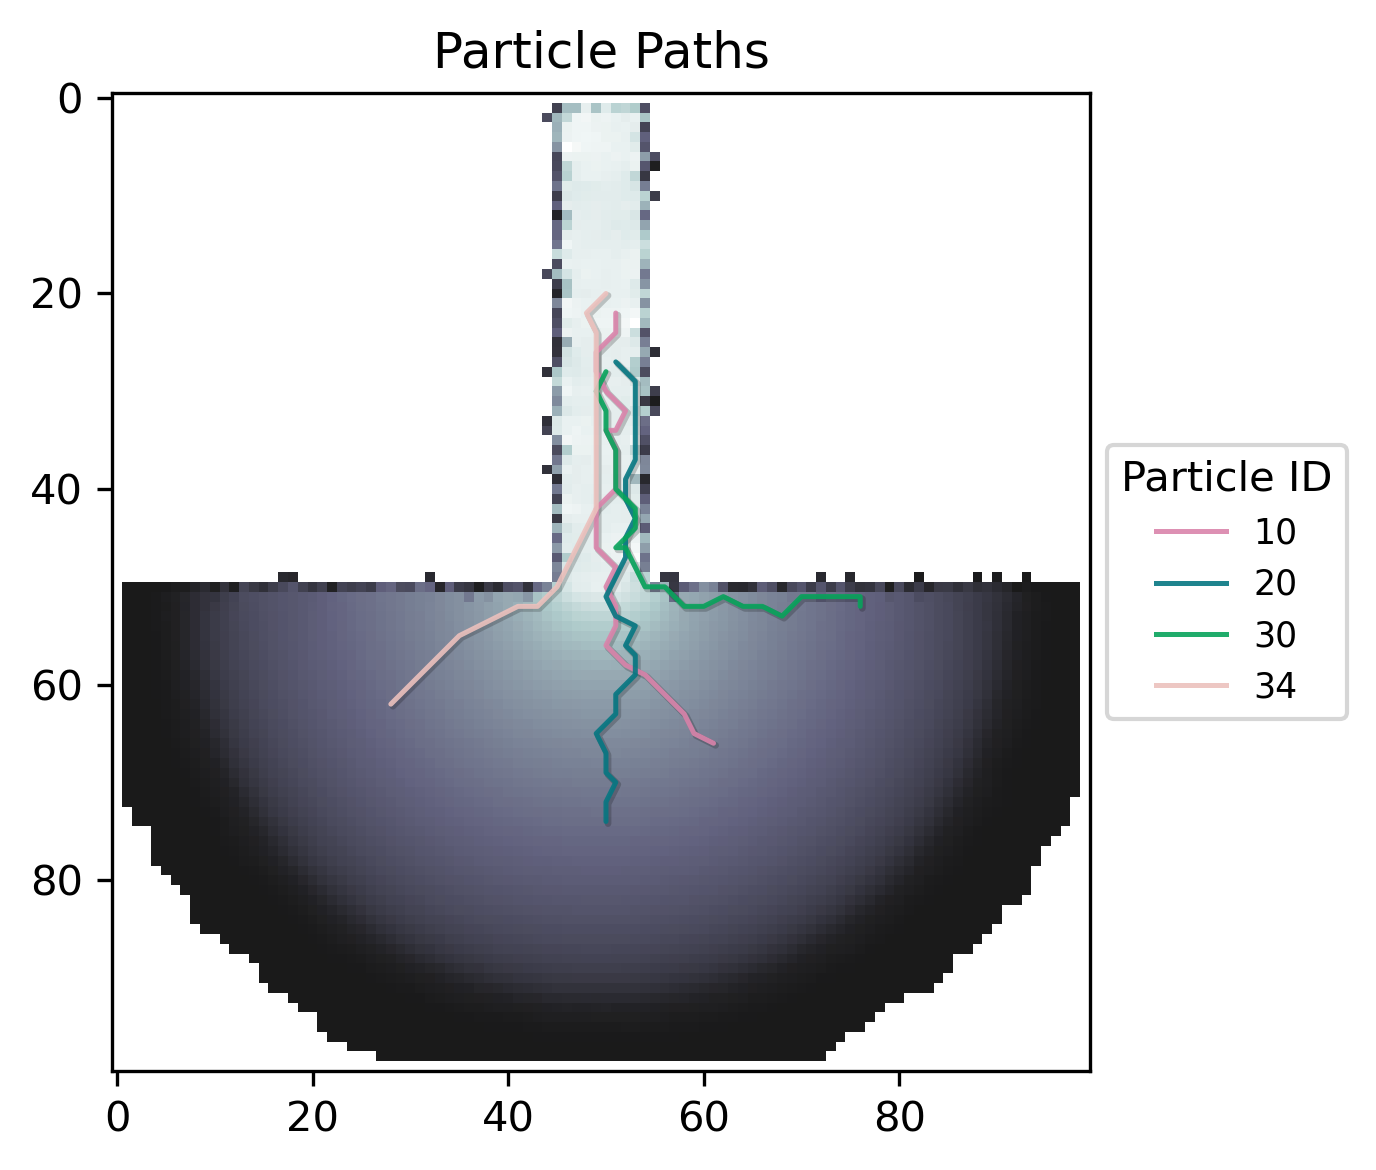

In [8]:
# import draw_travel_path
from dorado.routines import draw_travel_path

# the function requires the water depth, walk data generated using the steady_plots function, and the particle indices
draw_travel_path(depth, walk_data, [10, 20, 30, 34],'steady_anuga_example'+os.sep+'figs'+os.sep+'travel_paths_dt10.png',
                 interval=2, plot_legend=True)

**Hands-on exercise**

Play with the output by choosing different particle indices and intervals. Save three plots under different names and inspect them in your folder.

